#### **Regression-Analysis-Team-Project** by Team 1

### [Kaggle competition] 
# Zillow Prize: Zillow’s Home Value Prediction (Zestimate)
### Can you improve the algorithm that changed the world of real estate?

## **1. Data Introduce**

### 1.1 Purpose
- Target: log-error
    - log-error between their Zestimate(house price estimation) and the actual sale price
    - calculation: $logerror=log(Zestimate)−log(SalePrice)$
- Feature: all given features of a home 
- 모든 properties에 대해 2016년 10월, 11월, 12월 & 2017년 10월, 11월, 12월 6개 시점의 logerror를 예측

### 1.2 Data set:
- a full list of real estate properties in three counties (Los Angeles, Orange and Ventura, California)
- Properties data
    - properties_2016.csv - all the properties with their home features for 2016
    - properties_2017.csv - all the properties with their home features for 2017
- Train data: 거래된 집에 대한 데이터
    - parcelid, transaction date, logerror 3개 column으로 이루어짐
    - train_2016.csv - the training set with transactions from 1/1/2016 to 12/31/2016
    - train_2017.csv - the training set with transactions from 1/1/2017 to 9/15/2017    

## **2. EDA - Exploring the Data!**

#### Importing necessary libraries

In [2]:
####### what's in startup file #######
import numpy as np
import scipy as sp
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import sklearn as sk

import matplotlib as mpl
mpl.use('Agg')
import matplotlib.pyplot as plt
# import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D

import seaborn as sns
sns.set()
sns.set_style("whitegrid")
sns.set_color_codes()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in 

In [3]:
####### what's not in startup file #######

%matplotlib inline   

# ignore warning messeges
import warnings
warnings.filterwarnings('ignore')

# excel file
import xlrd
import openpyxl

import time
# import folium

#### Importing Data

##### (1) Properties Data

In [4]:
prop16 = pd.read_csv('data/properties_2016.csv')

In [5]:
prop17 = pd.read_csv('data/properties_2017.csv')

##### (2) Train Data

In [6]:
train16 = pd.read_csv('data/train_2016_v2.csv', parse_dates=["transactiondate"])

In [7]:
train17 = pd.read_csv('data/train_2017.csv', parse_dates=["transactiondate"])

### 2.1 Data Shape 

#### (1) Properties Data

In [8]:
prop16.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,168176230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,14273630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,168040630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,168040830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,168040430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
prop17.tail()

,parcelid,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,buildingclasstypeid,buildingqualitytypeid,calculatedbathnbr,decktypeid,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
2985212,12170430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985213,11422430,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985214,17203030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985215,14242830,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2985216,12766630,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
print("shape of prop16: ", prop16.shape)
print("shape of prop17: ", prop17.shape)

shape of prop16:  (2985217, 58)
shape of prop17:  (2985217, 58)


In [11]:
# prop16과 prop17의 parcelid를 합쳤을 때 개수를 확인 (join="inner": 두 column에 다 있는 경우 결합)
id16 = prop16["parcelid"].rename(columns={"parcelid":"2016"})
id17 = prop16["parcelid"].rename(columns={"parcelid":"2017"})
id = pd.concat([id16, id17], axis=1, join='inner') 
print("shape of id: ", id.shape)
id[0][id[0]!=id[1]]    # 2016과 2017이 다를 때로 filtering

shape of id:  (2985217, 2)


Series([], Name: 0, dtype: int64)

##### Comment:
- Propertie data는 2016년과 2017년 모두 (2985217 * 58)로 shape이 동일함 (2985217개의 집에 대한 58개 특징 변수)
- 2016년과 2017년 data의 parcelid는 완전히 동일함, 즉 두 데이터는 같은 집들에 대한 2개 년도의 집의 특징에 대한 자료임

#### (2) Train Data

In [12]:
train16.tail()

,parcelid,logerror,transactiondate
90270,10774160,-0.0356,2016-12-30
90271,12046695,0.0070,2016-12-30
90272,12995401,-0.2679,2016-12-30
90273,11402105,0.0602,2016-12-30
90274,12566293,0.4207,2016-12-30


In [13]:
train17.tail()

,parcelid,logerror,transactiondate
77608,10833991,-0.002245,2017-09-20
77609,11000655,0.020615,2017-09-20
77610,17239384,0.013209,2017-09-21
77611,12773139,0.037129,2017-09-21
77612,12826780,0.007204,2017-09-25


In [14]:
train16['transactiondate'] = pd.to_datetime(train16['transactiondate'])
train16['transaction_year'] = train16['transactiondate'].dt.year
train16['transaction_month'] = train16['transactiondate'].dt.month
train16.tail()

,parcelid,logerror,transactiondate,transaction_year,transaction_month
90270,10774160,-0.0356,2016-12-30,2016,12
90271,12046695,0.0070,2016-12-30,2016,12
90272,12995401,-0.2679,2016-12-30,2016,12
90273,11402105,0.0602,2016-12-30,2016,12
90274,12566293,0.4207,2016-12-30,2016,12


In [15]:
train17['transactiondate'] = pd.to_datetime(train17['transactiondate'])
train17['transaction_year'] = train17['transactiondate'].dt.year
train17['transaction_month'] = train17['transactiondate'].dt.month
train17.tail()

,parcelid,logerror,transactiondate,transaction_year,transaction_month
77608,10833991,-0.002245,2017-09-20,2017,9
77609,11000655,0.020615,2017-09-20,2017,9
77610,17239384,0.013209,2017-09-21,2017,9
77611,12773139,0.037129,2017-09-21,2017,9
77612,12826780,0.007204,2017-09-25,2017,9


In [16]:
print("shape of train16: ",train16.shape)
print("shape of train17: ",train17.shape)

shape of train16:  (90275, 5)
shape of train17:  (77613, 5)


##### Comment:
- 2016년 data는 90275건의 거래를, 2017년 data는 77613건의 거래를 포함하고 있음 
- 연도 및 월별 거래량 파악을 위해 두 train data에 'transaction_year', 'transaction_month', 'transaction_count' 컬럼을 추가

#### (3) Merging Train and Properties Data

##### 분석을 위해 하나의 Train Data로 만들기
1. 각 년도의 train data를 기준으로 properties data를 merge함 (거래마다 그 집의 특징을 properties에서 가져오는 것)
2. 그 후 merge한 2016년 data와 2017년 data를 (위아래로) 연결함
3. 결과적으로 2016년~2017년의 모든 거래에 대해 해당하는 집의 특징을 merge한 하나의 train data가 구성됨

In [17]:
# traing16을 기준으로 prop16을 merge
merged16 = pd.merge(train16, prop16, on="parcelid", how="left")
merged16.tail()

,parcelid,logerror,transactiondate,transaction_year,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
90270,10774160,-0.0356,2016-12-30,2016,12,1.0,NaN,NaN,1.0,1.0,...,NaN,NaN,43800.0,191000.0,2015.0,147200.0,2495.24,NaN,NaN,6.037132e+13
90271,12046695,0.0070,2016-12-30,2016,12,NaN,NaN,NaN,3.0,3.0,...,NaN,NaN,117893.0,161111.0,2015.0,43218.0,1886.54,NaN,NaN,6.037301e+13
90272,12995401,-0.2679,2016-12-30,2016,12,NaN,NaN,NaN,2.0,4.0,...,NaN,NaN,22008.0,38096.0,2015.0,16088.0,1925.70,Y,14.0,6.037433e+13
90273,11402105,0.0602,2016-12-30,2016,12,NaN,NaN,NaN,2.0,2.0,...,NaN,NaN,132991.0,165869.0,2015.0,32878.0,2285.57,NaN,NaN,6.037601e+13
90274,12566293,0.4207,2016-12-30,2016,12,NaN,NaN,NaN,1.0,3.0,...,NaN,NaN,66258.0,163037.0,2015.0,96779.0,2560.96,NaN,NaN,6.037544e+13


In [18]:
# traing17을 기준으로 prop17을 merge
merged17 = pd.merge(train17, prop17, on="parcelid", how="left")
merged17.tail()

,parcelid,logerror,transactiondate,transaction_year,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
77608,10833991,-0.002245,2017-09-20,2017,9,1.0,NaN,NaN,3.0,3.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
77609,11000655,0.020615,2017-09-20,2017,9,NaN,NaN,NaN,2.0,2.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
77610,17239384,0.013209,2017-09-21,2017,9,NaN,NaN,NaN,2.0,4.0,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
77611,12773139,0.037129,2017-09-21,2017,9,1.0,NaN,NaN,1.0,3.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13
77612,12826780,0.007204,2017-09-25,2017,9,NaN,NaN,NaN,2.0,3.0,...,NaN,NaN,140000.0,522000.0,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13


In [19]:
merged = pd.concat([merged16, merged17]).reset_index(drop=True)
merged.tail()

,parcelid,logerror,transactiondate,transaction_year,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
167883,10833991,-0.002245,2017-09-20,2017,9,1.0,NaN,NaN,3.0,3.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
167884,11000655,0.020615,2017-09-20,2017,9,NaN,NaN,NaN,2.0,2.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
167885,17239384,0.013209,2017-09-21,2017,9,NaN,NaN,NaN,2.0,4.0,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
167886,12773139,0.037129,2017-09-21,2017,9,1.0,NaN,NaN,1.0,3.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13
167887,12826780,0.007204,2017-09-25,2017,9,NaN,NaN,NaN,2.0,3.0,...,NaN,NaN,140000.0,522000.0,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13


In [20]:
print("shape of merged: ", merged.shape)

shape of merged:  (167888, 62)


#### (4) Status of merged data

In [21]:
merged_des = merged.describe(include='all').transpose()
merged_des["dtype"] = merged.dtypes
merged_des.reset_index().tail()

,index,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max,dtype
57,landtaxvaluedollarcnt,167851,NaN,NaN,NaN,NaN,NaN,288880,445645,22,83730,197776,355334,4.89522e+07,float64
58,taxamount,167843,NaN,NaN,NaN,NaN,NaN,5989.52,7214.73,19.92,2798.07,4501.04,6914.16,586639,float64
59,taxdelinquencyflag,4683,1,Y,4683,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,object
60,taxdelinquencyyear,4683,NaN,NaN,NaN,NaN,NaN,13.8272,2.42166,3,13,14,15,99,float64
61,censustractandblock,167002,NaN,NaN,NaN,NaN,NaN,6.04939e+13,1.05414e+12,6.0371e+13,6.03731e+13,6.0376e+13,6.05904e+13,4.8303e+14,float64


##### Comment:
- data merge 결과 2016년&2017년의 167,888건의 거래에 대해 parcelid 포함 60개 변수를 가진 하나의 data가 만들어짐
- 변수: logerror(target), 거래날짜, properties data(해당 거래 년도의 data)
- 카테고리 타입 변수가 많고, 변수들의 missing value가 매우 많음

##### 연도 및 월별 거래량

In [22]:
transaction_2016_month = train16["transaction_month"].value_counts()
transaction_2016_month = pd.DataFrame(transaction_2016_month.reset_index())
transaction_2016_month = \
transaction_2016_month.rename(columns={'index':'month','transaction_month':'transaction_count'})
transaction_2016_month['year']=2016
transaction_2016_month

,month,transaction_count,year
0,6,10922,2016
1,8,10476,2016
2,5,9961,2016
3,7,9947,2016
4,9,9575,2016
5,4,9311,2016
6,3,8652,2016
7,1,6556,2016
8,2,6333,2016
9,10,4977,2016


In [23]:
transaction_2017_month = train17["transaction_month"].value_counts()
transaction_2017_month = pd.DataFrame(transaction_2017_month.reset_index())
transaction_2017_month = \
transaction_2017_month.rename(columns={'index':'month','transaction_month':'transaction_count'})
transaction_2017_month['year']=2017
transaction_2017_month

,month,transaction_count,year
0,6,11456,2017
1,5,10487,2017
2,8,9936,2017
3,7,9490,2017
4,3,9327,2017
5,4,8679,2017
6,1,7025,2017
7,2,6412,2017
8,9,4801,2017


In [24]:
transaction_df = pd.concat([transaction_2016_month, transaction_2017_month]).reset_index(drop=True)
transaction_df

,month,transaction_count,year
0,6,10922,2016
1,8,10476,2016
2,5,9961,2016
3,7,9947,2016
4,9,9575,2016
5,4,9311,2016
6,3,8652,2016
7,1,6556,2016
8,2,6333,2016
9,10,4977,2016


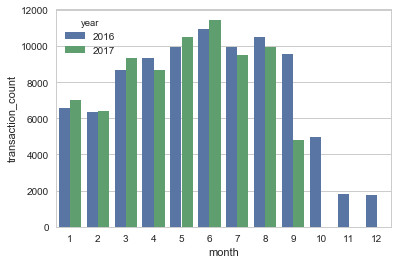

In [25]:
sns.barplot(data=transaction_df, x="month",y="transaction_count", hue="year")

##### 연도 및 월별 logerror

In [26]:
merged.tail()

,parcelid,logerror,transactiondate,transaction_year,transaction_month,airconditioningtypeid,architecturalstyletypeid,basementsqft,bathroomcnt,bedroomcnt,...,numberofstories,fireplaceflag,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,taxdelinquencyflag,taxdelinquencyyear,censustractandblock
167883,10833991,-0.002245,2017-09-20,2017,9,1.0,NaN,NaN,3.0,3.0,...,NaN,NaN,265000.0,379000.0,2016.0,114000.0,4685.34,NaN,NaN,6.037132e+13
167884,11000655,0.020615,2017-09-20,2017,9,NaN,NaN,NaN,2.0,2.0,...,NaN,NaN,70917.0,354621.0,2016.0,283704.0,4478.43,NaN,NaN,6.037101e+13
167885,17239384,0.013209,2017-09-21,2017,9,NaN,NaN,NaN,2.0,4.0,...,1.0,NaN,50683.0,67205.0,2016.0,16522.0,1107.48,NaN,NaN,6.111008e+13
167886,12773139,0.037129,2017-09-21,2017,9,1.0,NaN,NaN,1.0,3.0,...,NaN,NaN,32797.0,49546.0,2016.0,16749.0,876.43,NaN,NaN,6.037434e+13
167887,12826780,0.007204,2017-09-25,2017,9,NaN,NaN,NaN,2.0,3.0,...,NaN,NaN,140000.0,522000.0,2016.0,382000.0,6317.15,NaN,NaN,6.037503e+13


In [27]:
transaction_logerror_df = merged[['logerror','transaction_year','transaction_month']]
transaction_logerror_df.tail()

,logerror,transaction_year,transaction_month
167883,-0.002245,2017,9
167884,0.020615,2017,9
167885,0.013209,2017,9
167886,0.037129,2017,9
167887,0.007204,2017,9


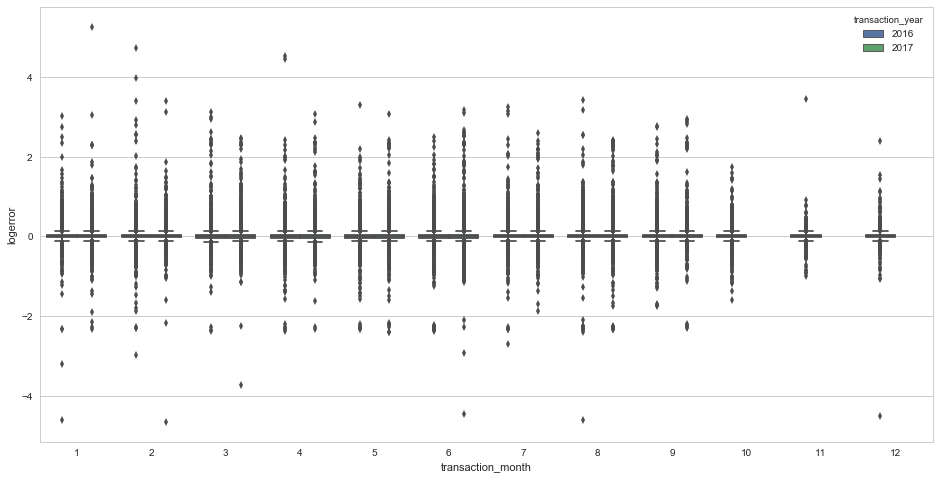

In [28]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
sns.boxplot(data=transaction_logerror_df, x="transaction_month",y="logerror", hue="transaction_year")
plt.show()

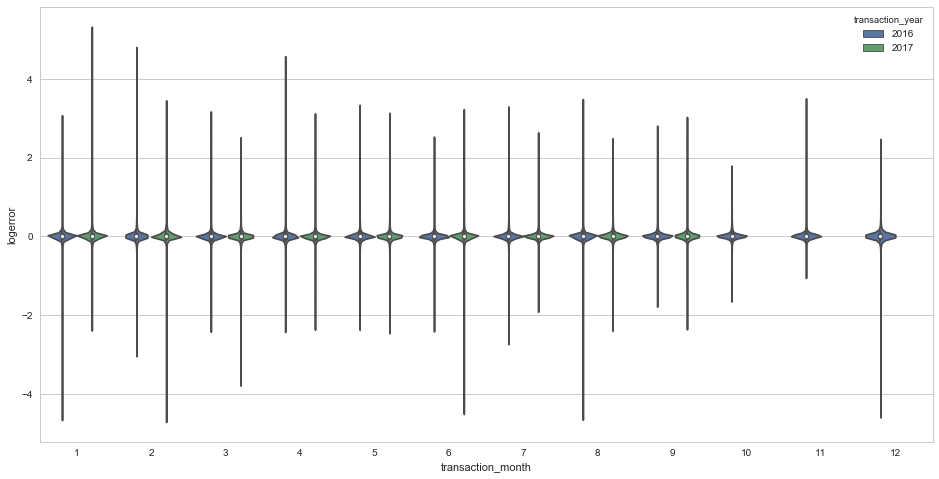

In [29]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
sns.violinplot(data=transaction_logerror_df, x="transaction_month",y="logerror", hue="transaction_year")
plt.show()

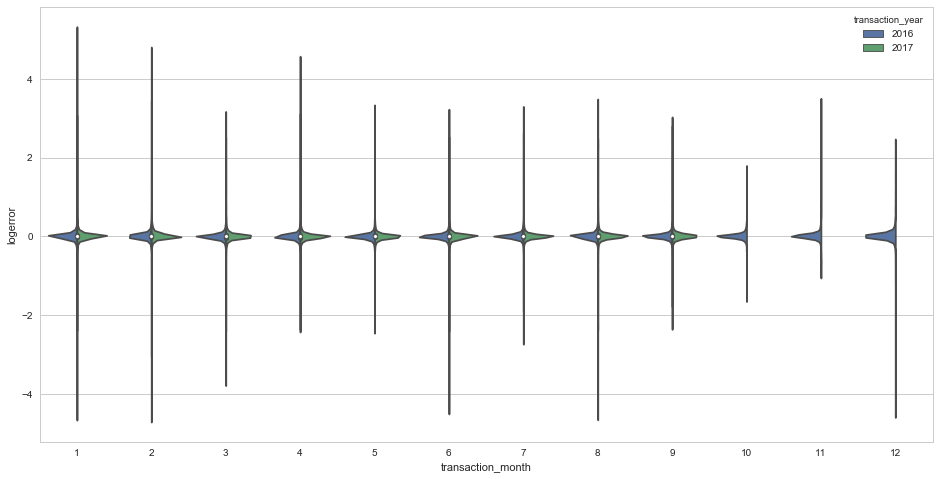

In [30]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
sns.violinplot(data=transaction_logerror_df, x="transaction_month",y="logerror", hue="transaction_year",split=True)
plt.show()

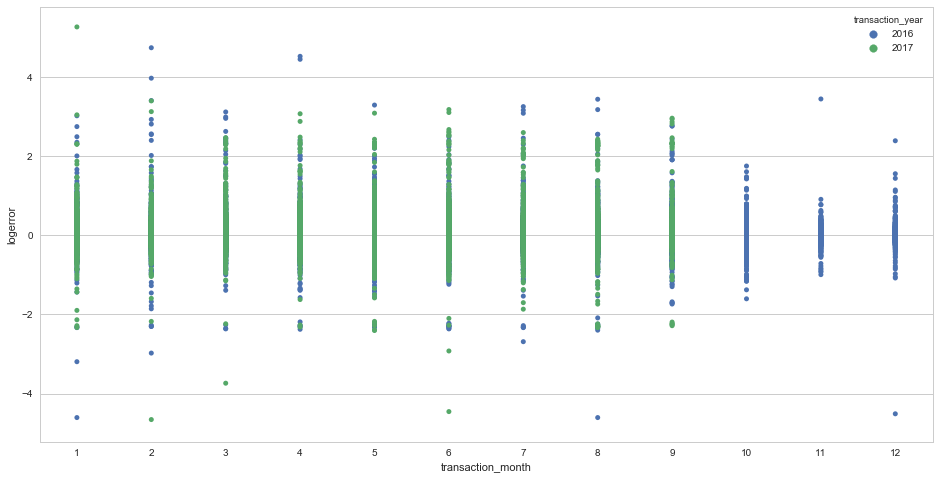

In [31]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
sns.stripplot(data=transaction_logerror_df, x="transaction_month",y="logerror", hue="transaction_year")
plt.show()

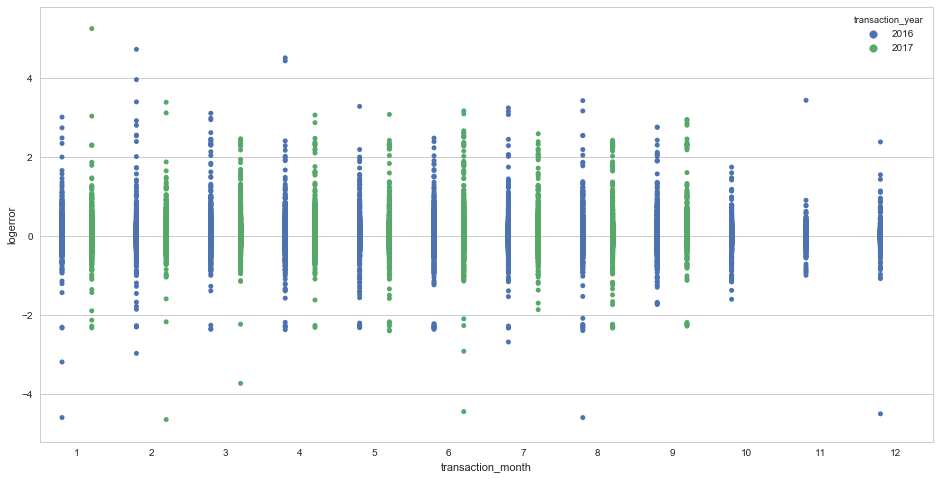

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
sns.stripplot(data=transaction_logerror_df, x="transaction_month",y="logerror", hue="transaction_year",dodge=True)
plt.show()

### 2.2 Exploring Target Variable: logerror

#### logerror의 분포

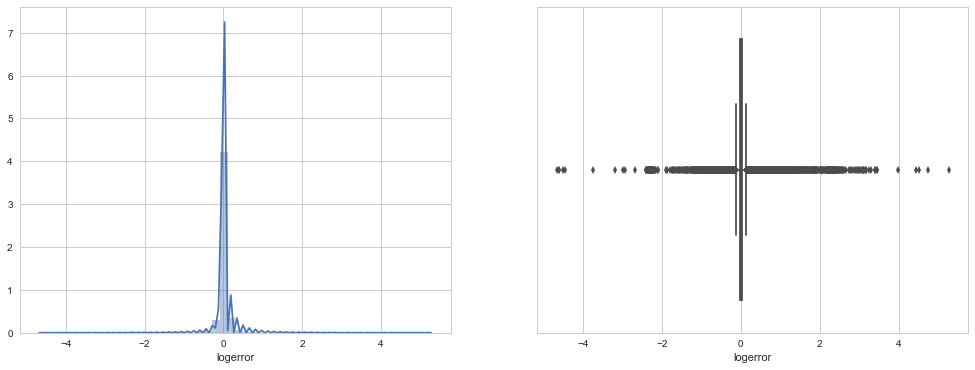

    index   logerror
0   count     167888
6    mean  0.0139063
7     std   0.165706
8     min   -4.65542
9     25%    -0.0253
10    50%      0.006
11    75%     0.0392
12    max      5.263
13  dtype    float64


In [33]:
plt.figure(figsize=(17,6))

plt.subplot(121)
sns.distplot(merged["logerror"])

plt.subplot(122)
sns.boxplot(merged["logerror"])
plt.show()

print(merged_des.loc["logerror"].reset_index().loc[[0, 6, 7, 8, 9, 10, 11, 12, 13],:])

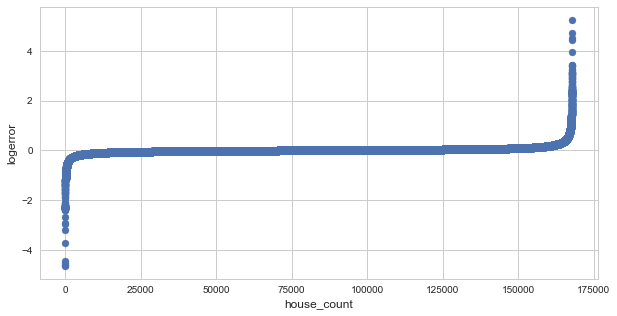

In [34]:
# logerror를 작은 값부터 정렬하여 분포를 살핌
plt.figure(figsize=(10,5))
plt.scatter(range(merged.shape[0]), np.sort(merged["logerror"]))
plt.xlabel('house_count', fontsize=12)
plt.ylabel('logerror', fontsize=12)
plt.show()

##### Comment:
- logerror의 평균은 약 0.01로 zestimation의 logerror는 평균적으로 0에 가깝다 (집값 예측이 대체로 잘 되고 있음)
- 대부분의 값들이 평균인 0 근처에 모여있고, 정규분포와 비슷한 형태를 보이지만 logerror가 상대적으로 아주 큰 outliers들 존재
- logerror는 평균인 0 근처를 기준으로 음수와 양수 양방향으로 분포하고 있음
- 가격을 아주 낮게 예측하거나 높게 예측하는 일부분의 outlier 집들이 logerror를 낮추는 key일수도 있을까?

### 2.3 Exploring Feature Variables

#### 2.3.1 변수별 missing value ratio

In [35]:
merged_des["missing_ratio"] = 1-(merged_des["count"]/merged.shape[0])
merged_missing = pd.DataFrame(merged_des["missing_ratio"].sort_values(ascending=False))
merged_missing.reset_index()

,index,missing_ratio
0,buildingclasstypeid,0.999815
1,finishedsquarefeet13,0.999553
2,basementsqft,0.999446
3,storytypeid,0.999446
4,yardbuildingsqft26,0.999017
5,fireplaceflag,0.997653
6,architecturalstyletypeid,0.997212
7,typeconstructiontypeid,0.996891
8,finishedsquarefeet6,0.995193
9,decktypeid,0.992424


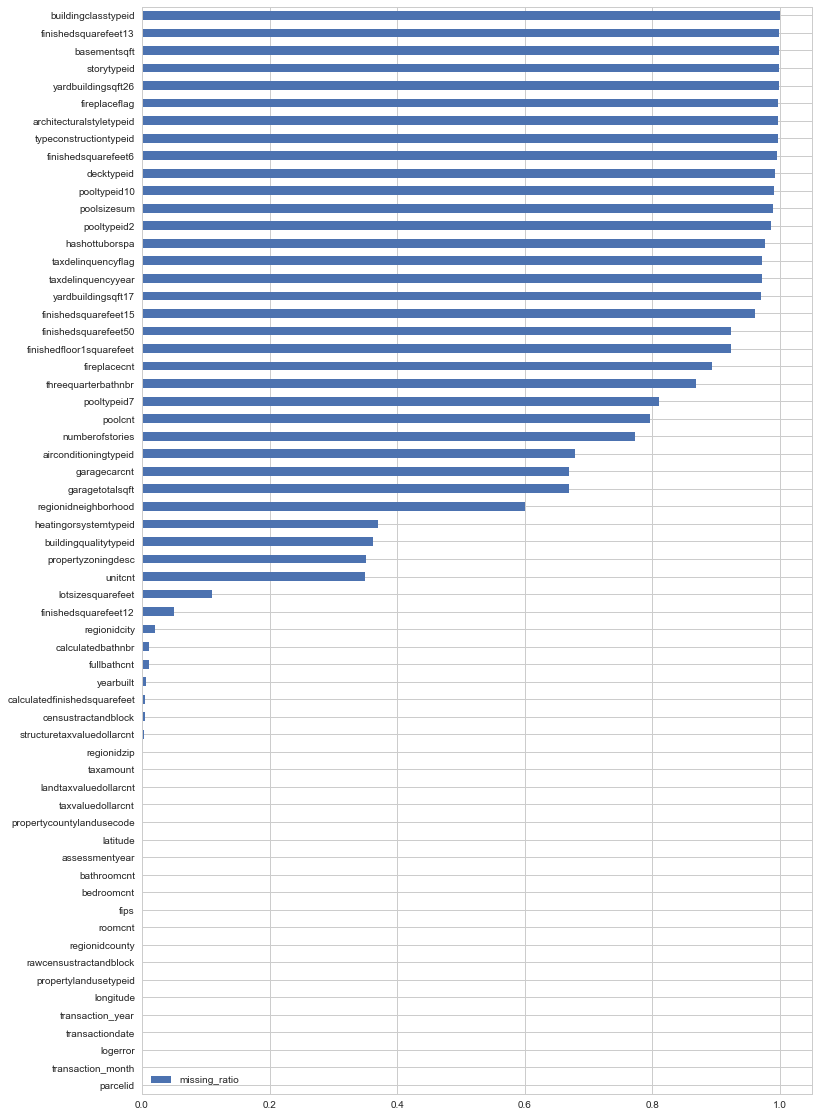

In [36]:
merged_missing.sort_values(by = "missing_ratio", ascending = True).plot(kind = 'barh', figsize=(12,20))
plt.show()

##### Comment:
- missing value ratio가 매우 높은 변수들이 많음
- missing value ratio가 높은 변수들(say, over 75%?)은 이후에 변수들을 주제별로 묶어 살펴보면서, 합리적이고 설득력있는 imputation 방안이 없다고 생각될 경우 변수를 삭제하는 방향으로 가고자 함

#### 2.3.2 주제별 변수 탐색

##### 1) 집의 위치, 지역 등 지리정보와 관련된 변수들
- 전체 리스트: fips, latitude, longitude, rawcensustractandblock, censustractandblock, regionidcounty, regionidcity, regionidzip, regionidneighborhood

##### 2) 건물 특징, 타입 등에 대한 변수들
- 전체 리스트: architecturalstyletypeid, decktypeid, buildingqualitytypeid, buildingclasstypeid, storytypeid, typeconstructiontypeid, propertycountylandusecode, propertylandusetypeid, propertyzoningdesc

##### 3) 집 구조 등에 대한 변수들
- 전체 리스트: bathroomcnt, calculatedbathnbr, threequarterbathnbr, fullbathcnt, numberofstories, roomcnt, bedroomcnt, unitcnt, yearbuilt

##### 4) 집의 기타 특징(유틸리티 등)에 대한 변수들
- 전체 리스트: heatingorsystemtypeid, airconditioningtypeid, hashottuborspa, fireplacecnt, fireplaceflag, poolcnt, poolsizesum, pooltypeid10, pooltypeid2, pooltypeid7

##### 5) 집의 면적에 대한 변수들 (total 13)
- basementsqft
- finishedfloor1squarefeet
- calculatedfinishedsquarefeet
- finishedsquarefeet6
- finishedsquarefeet12
- finishedsquarefeet13
- finishedsquarefeet15
- finishedsquarefeet50
- yardbuildingsqft17
- yardbuildingsqft26
- garagecarcnt
- garagetotalsqft
- lotsizesquarefeet

In [37]:
feet_columns = ["parcelid","logerror","basementsqft","calculatedfinishedsquarefeet"\
               ,"finishedfloor1squarefeet","finishedsquarefeet6","finishedsquarefeet12"\
               ,"finishedsquarefeet13","finishedsquarefeet15","finishedsquarefeet50"\
               ,"yardbuildingsqft17","yardbuildingsqft26","garagecarcnt","garagetotalsqft"\
               ,"lotsizesquarefeet"]
feet_df = merged[feet_columns]
feet_df = feet_df.set_index('parcelid')
feet_df.tail()

,logerror,basementsqft,calculatedfinishedsquarefeet,finishedfloor1squarefeet,finishedsquarefeet6,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,yardbuildingsqft17,yardbuildingsqft26,garagecarcnt,garagetotalsqft,lotsizesquarefeet
parcelid,,,,,,,,,,,,,,
10833991,-0.002245,NaN,1741.0,NaN,NaN,1741.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,59487.0
11000655,0.020615,NaN,1286.0,NaN,NaN,1286.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47405.0
17239384,0.013209,NaN,1612.0,1612.0,NaN,1612.0,NaN,NaN,1612.0,656.0,NaN,2.0,560.0,12105.0
12773139,0.037129,NaN,1032.0,NaN,NaN,1032.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5074.0
12826780,0.007204,NaN,1762.0,NaN,NaN,1762.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6347.0


In [38]:
feet_df.shape

(167888, 14)

#### - All feet variables's describe + Data Type + Missing Value Ratio

In [39]:
feet_df_desc = feet_df.describe().transpose()
feet_df_desc["data type"] = feet_df.dtypes
feet_df_desc["MV ratio"] = round(feet_df.isnull().sum()/feet_df.shape[0]*100,3)
feet_df_desc 

,count,mean,std,min,25%,50%,75%,max,data type,MV ratio
logerror,167888.0,0.013906,0.165706,-4.65542,-0.0253,0.006,0.0392,5.262999e+00,float64,0.000
basementsqft,93.0,695.376344,583.952144,38.00000,280.0000,588.000,819.0000,3.560000e+03,float64,99.945
calculatedfinishedsquarefeet,166992.0,1778.630246,940.356025,2.00000,1183.0000,1541.000,2103.0000,3.564000e+04,float64,0.534
finishedfloor1squarefeet,12893.0,1356.491895,661.068564,44.00000,945.0000,1252.000,1615.0000,7.625000e+03,float64,92.320
finishedsquarefeet6,807.0,2197.294919,1300.554048,257.00000,1057.0000,1886.000,3240.0000,7.224000e+03,float64,99.519
finishedsquarefeet12,159519.0,1752.326939,921.360898,2.00000,1172.0000,1520.000,2065.0000,2.192900e+04,float64,4.985
finishedsquarefeet13,75.0,1395.706667,116.539145,1056.00000,1344.0000,1440.000,1440.0000,1.584000e+03,float64,99.955
finishedsquarefeet15,6591.0,2368.333485,1124.302411,560.00000,1634.0000,2099.000,2845.0000,3.564000e+04,float64,96.074
finishedsquarefeet50,12893.0,1367.647018,698.669027,44.00000,945.0000,1252.000,1619.0000,1.246700e+04,float64,92.320
yardbuildingsqft17,5039.0,307.919032,227.430960,11.00000,175.0000,252.000,375.0000,3.191000e+03,float64,96.999


#### - All Feet variables's Missing Value Plot

In [40]:
feet_missing = pd.DataFrame(feet_df_desc["MV ratio"].sort_values(ascending=False))
feet_missing

,MV ratio
finishedsquarefeet13,99.955
basementsqft,99.945
yardbuildingsqft26,99.902
finishedsquarefeet6,99.519
yardbuildingsqft17,96.999
finishedsquarefeet15,96.074
finishedsquarefeet50,92.320
finishedfloor1squarefeet,92.320
garagetotalsqft,66.968
garagecarcnt,66.968


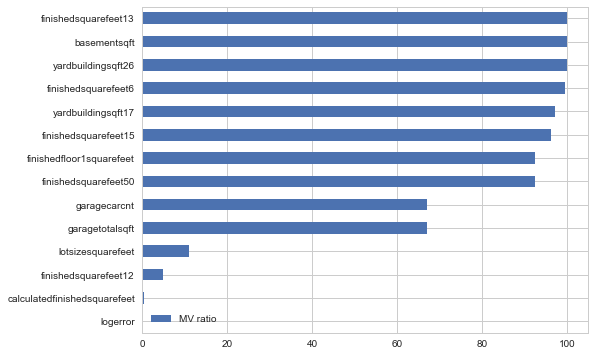

In [41]:
feet_missing.sort_values(by = "MV ratio", ascending = True).plot(kind = 'barh', figsize=(8,6))
plt.show()

##### (5)-1. basementsqft
- Finished living area below or partially below ground level
- 지면보다 낮거나 부분적으로 낮은 완성된 거주 구역


In [42]:
feet_df_desc.loc['basementsqft'].reset_index()

,index,basementsqft
0,count,93
1,mean,695.376
2,std,583.952
3,min,38
4,25%,280
5,50%,588
6,75%,819
7,max,3560
8,data type,float64
9,MV ratio,99.945


(array([ 31.,  32.,  14.,   7.,   5.,   2.,   0.,   0.,   1.,   1.]),
 array([   38. ,   390.2,   742.4,  1094.6,  1446.8,  1799. ,  2151.2,
         2503.4,  2855.6,  3207.8,  3560. ]),
 <a list of 10 Patch objects>)

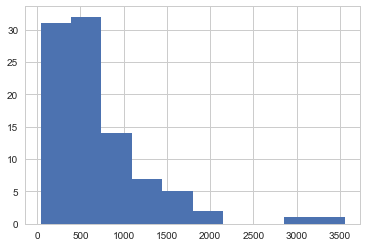

In [43]:
plt.hist(feet_df[feet_df['basementsqft'].notnull()==True]['basementsqft'])

In [44]:
# sns.distplot(feet_df['basementsqft'].notnull(), kde=True, rug=True)

##### (5)-2. calculatedfinishedsquarefeet
- Calculated total finished living area of the home 
- 가정의 (마감)완료된 총 거주 면적

In [45]:
feet_df['calculatedfinishedsquarefeet'].value_counts().head().reset_index()

,index,calculatedfinishedsquarefeet
0,1200.0,370
1,1120.0,324
2,1080.0,312
3,1440.0,305
4,1040.0,269


In [46]:
feet_df_desc.loc['calculatedfinishedsquarefeet'].reset_index()

,index,calculatedfinishedsquarefeet
0,count,166992
1,mean,1778.63
2,std,940.356
3,min,2
4,25%,1183
5,50%,1541
6,75%,2103
7,max,35640
8,data type,float64
9,MV ratio,0.534


(array([  1.59086000e+05,   7.52300000e+03,   3.37000000e+02,
          3.00000000e+01,   8.00000000e+00,   5.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  2.00000000e+00,   3.56580000e+03,   7.12960000e+03,
          1.06934000e+04,   1.42572000e+04,   1.78210000e+04,
          2.13848000e+04,   2.49486000e+04,   2.85124000e+04,
          3.20762000e+04,   3.56400000e+04]),
 <a list of 10 Patch objects>)

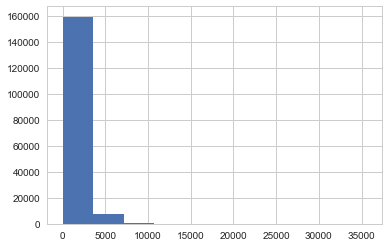

In [47]:
plt.hist(feet_df[feet_df['calculatedfinishedsquarefeet'].notnull()==True]['calculatedfinishedsquarefeet'])

##### (5)-3. finishedfloor1squarefeet
- Size of the finished living area on the first (entry) floor of the
- 주택 1층 생활 공간의 규모


In [48]:
feet_df['finishedfloor1squarefeet'].value_counts().head().reset_index()

,index,finishedfloor1squarefeet
0,1431.0,42
1,1260.0,41
2,1226.0,41
3,1252.0,39
4,1462.0,37


In [49]:
feet_df_desc.loc['finishedfloor1squarefeet'].reset_index()

,index,finishedfloor1squarefeet
0,count,12893
1,mean,1356.49
2,std,661.069
3,min,44
4,25%,945
5,50%,1252
6,75%,1615
7,max,7625
8,data type,float64
9,MV ratio,92.32


(array([  2.06000000e+03,   7.21600000e+03,   2.75300000e+03,
          5.50000000e+02,   1.87000000e+02,   7.80000000e+01,
          2.80000000e+01,   1.00000000e+01,   8.00000000e+00,
          3.00000000e+00]),
 array([   44. ,   802.1,  1560.2,  2318.3,  3076.4,  3834.5,  4592.6,
         5350.7,  6108.8,  6866.9,  7625. ]),
 <a list of 10 Patch objects>)

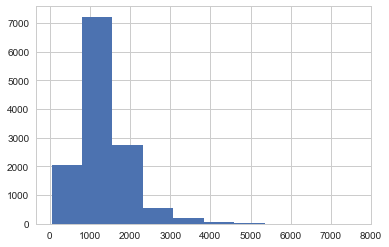

In [50]:
plt.hist(feet_df[feet_df['finishedfloor1squarefeet'].notnull()==True]['finishedfloor1squarefeet'])

##### (5)-4. finishedsquarefeet6
- Base unfinished and finished area
- 기본 완료 및 완료되지 않은 영역

In [51]:
feet_df_desc.loc['finishedsquarefeet6'].reset_index()

,index,finishedsquarefeet6
0,count,807
1,mean,2197.29
2,std,1300.55
3,min,257
4,25%,1057
5,50%,1886
6,75%,3240
7,max,7224
8,data type,float64
9,MV ratio,99.519


(array([ 166.,  181.,  142.,   90.,   97.,   93.,   27.,    7.,    3.,    1.]),
 array([  257. ,   953.7,  1650.4,  2347.1,  3043.8,  3740.5,  4437.2,
         5133.9,  5830.6,  6527.3,  7224. ]),
 <a list of 10 Patch objects>)

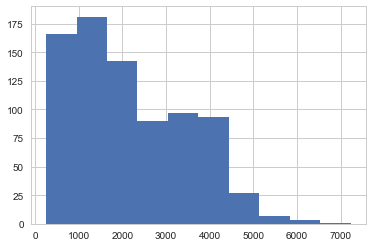

In [52]:
plt.hist(feet_df[feet_df['finishedsquarefeet6'].notnull()==True]['finishedsquarefeet6'])

##### (5)-5. finishedsquarefeet12
- Finished living area
- (마감)완료된 생활 공간

In [53]:
feet_df_desc.loc['finishedsquarefeet12'].reset_index()

,index,finishedsquarefeet12
0,count,159519
1,mean,1752.33
2,std,921.361
3,min,2
4,25%,1172
5,50%,1520
6,75%,2065
7,max,21929
8,data type,float64
9,MV ratio,4.985


(array([  1.25263000e+05,   3.13550000e+04,   2.36900000e+03,
          4.02000000e+02,   8.90000000e+01,   2.40000000e+01,
          8.00000000e+00,   4.00000000e+00,   2.00000000e+00,
          3.00000000e+00]),
 array([  2.00000000e+00,   2.19470000e+03,   4.38740000e+03,
          6.58010000e+03,   8.77280000e+03,   1.09655000e+04,
          1.31582000e+04,   1.53509000e+04,   1.75436000e+04,
          1.97363000e+04,   2.19290000e+04]),
 <a list of 10 Patch objects>)

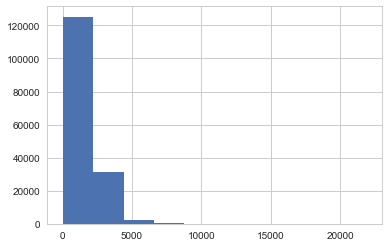

In [54]:
plt.hist(feet_df[feet_df['finishedsquarefeet12'].notnull()==True]['finishedsquarefeet12'])

##### (5)-6. finishedsquarefeet13
- Perimeter  living area
- 주변 생활 지역

In [55]:
feet_df_desc.loc['finishedsquarefeet13'].reset_index()

,index,finishedsquarefeet13
0,count,75
1,mean,1395.71
2,std,116.539
3,min,1056
4,25%,1344
5,50%,1440
6,75%,1440
7,max,1584
8,data type,float64
9,MV ratio,99.955


(array([  3.,   3.,   1.,   5.,   1.,   9.,   5.,  36.,   4.,   8.]),
 array([ 1056. ,  1108.8,  1161.6,  1214.4,  1267.2,  1320. ,  1372.8,
         1425.6,  1478.4,  1531.2,  1584. ]),
 <a list of 10 Patch objects>)

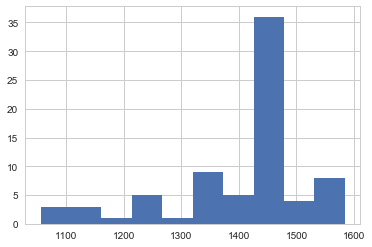

In [56]:
plt.hist(feet_df[feet_df['finishedsquarefeet13'].notnull()==True]['finishedsquarefeet13'])

##### (5)-7. finishedsquarefeet15
- Total area
- 총 면적

In [57]:
feet_df_desc.loc['finishedsquarefeet15'].reset_index()

,index,finishedsquarefeet15
0,count,6591
1,mean,2368.33
2,std,1124.3
3,min,560
4,25%,1634
5,50%,2099
6,75%,2845
7,max,35640
8,data type,float64
9,MV ratio,96.074


(array([  6.14100000e+03,   4.42000000e+02,   5.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   1.00000000e+00,
          1.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([   560.,   4068.,   7576.,  11084.,  14592.,  18100.,  21608.,
         25116.,  28624.,  32132.,  35640.]),
 <a list of 10 Patch objects>)

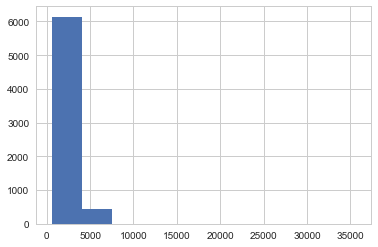

In [58]:
plt.hist(feet_df[feet_df['finishedsquarefeet15'].notnull()==True]['finishedsquarefeet15'])

##### (5)-8. finishedsquarefeet50
- Size of the finished living area on the first (entry) floor of the home
- 주택 1층 생활 공간의 규모

In [59]:
feet_df_desc.loc['finishedsquarefeet50'].reset_index()

,index,finishedsquarefeet50
0,count,12893
1,mean,1367.65
2,std,698.669
3,min,44
4,25%,945
5,50%,1252
6,75%,1619
7,max,12467
8,data type,float64
9,MV ratio,92.32


(array([  6.79300000e+03,   5.44000000e+03,   5.00000000e+02,
          1.14000000e+02,   2.50000000e+01,   1.40000000e+01,
          5.00000000e+00,   1.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([    44. ,   1286.3,   2528.6,   3770.9,   5013.2,   6255.5,
          7497.8,   8740.1,   9982.4,  11224.7,  12467. ]),
 <a list of 10 Patch objects>)

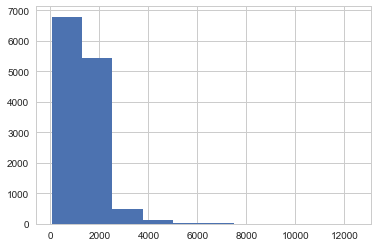

In [60]:
plt.hist(feet_df[feet_df['finishedsquarefeet50'].notnull()==True]['finishedsquarefeet50'])

##### (5)-9. yardbuildingsqft17
- Patio in  yard
- 마당의 파티오(보통 집 뒤쪽에 만드는 테라스)

In [61]:
feet_df_desc.loc['yardbuildingsqft17'].reset_index()

,index,yardbuildingsqft17
0,count,5039
1,mean,307.919
2,std,227.431
3,min,11
4,25%,175
5,50%,252
6,75%,375
7,max,3191
8,data type,float64
9,MV ratio,96.999


(array([  3.37600000e+03,   1.33900000e+03,   2.27000000e+02,
          6.60000000e+01,   1.50000000e+01,   7.00000000e+00,
          2.00000000e+00,   2.00000000e+00,   3.00000000e+00,
          2.00000000e+00]),
 array([   11.,   329.,   647.,   965.,  1283.,  1601.,  1919.,  2237.,
         2555.,  2873.,  3191.]),
 <a list of 10 Patch objects>)

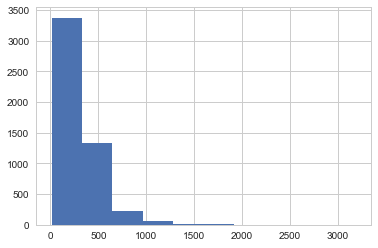

In [62]:
plt.hist(feet_df[feet_df['yardbuildingsqft17'].notnull()==True]['yardbuildingsqft17'])

##### (5)-10. yardbuildingsqft26
- Storage shed/building in yard
- 마당의 저장 창고

In [63]:
feet_df_desc.loc['yardbuildingsqft26'].reset_index()

,index,yardbuildingsqft26
0,count,165
1,mean,271.261
2,std,293.611
3,min,12
4,25%,88
5,50%,160
6,75%,320
7,max,1366
8,data type,float64
9,MV ratio,99.902


(array([ 79.,  35.,  19.,  11.,   6.,   1.,   4.,   3.,   5.,   2.]),
 array([   12. ,   147.4,   282.8,   418.2,   553.6,   689. ,   824.4,
          959.8,  1095.2,  1230.6,  1366. ]),
 <a list of 10 Patch objects>)

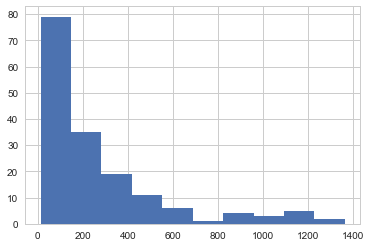

In [64]:
plt.hist(feet_df[feet_df['yardbuildingsqft26'].notnull()==True]['yardbuildingsqft26'])

##### (5)-11. garagecarcnt
- Total number of garages on the lot including an attached garage
- 부착된 차고를 포함한 부지의 총 차고 수

In [65]:
feet_df_desc.loc['garagecarcnt'].reset_index()

,index,garagecarcnt
0,count,55457
1,mean,1.81351
2,std,0.599447
3,min,0
4,25%,2
5,50%,2
6,75%,2
7,max,24
8,data type,float64
9,MV ratio,66.968


(array([  5.34700000e+04,   1.81300000e+03,   1.44000000e+02,
          1.70000000e+01,   8.00000000e+00,   4.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  0. ,   2.4,   4.8,   7.2,   9.6,  12. ,  14.4,  16.8,  19.2,
         21.6,  24. ]),
 <a list of 10 Patch objects>)

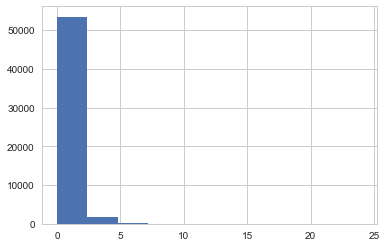

In [66]:
plt.hist(feet_df[feet_df['garagecarcnt'].notnull()==True]['garagecarcnt'])

##### (5)-12. garagetotalsqft
-  Total number of square feet of all garages on lot including an attached garage
- 부찯된 차고를 포함하여 부지에있는 모든 차고의 총 평방 피트

In [67]:
feet_df_desc.loc['garagetotalsqft'].reset_index()

,index,garagetotalsqft
0,count,55457
1,mean,347.604
2,std,264.566
3,min,0
4,25%,0
5,50%,434
6,75%,488
7,max,7339
8,data type,float64
9,MV ratio,66.968


(array([  5.38070000e+04,   1.56700000e+03,   5.40000000e+01,
          1.80000000e+01,   6.00000000e+00,   4.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([    0. ,   733.9,  1467.8,  2201.7,  2935.6,  3669.5,  4403.4,
         5137.3,  5871.2,  6605.1,  7339. ]),
 <a list of 10 Patch objects>)

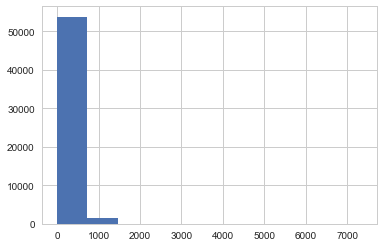

In [68]:
plt.hist(feet_df[feet_df['garagetotalsqft'].notnull()==True]['garagetotalsqft'])

##### (5)-13. lotsizesquarefeet
- Area of the lot in square feet
- 부지의 평방 피트 면적

In [69]:
feet_df_desc.loc['lotsizesquarefeet'].reset_index()

,index,lotsizesquarefeet
0,count,149446
1,mean,29510.6
2,std,122459
3,min,167
4,25%,5702
5,50%,7200
6,75%,11746.8
7,max,6.97101e+06
8,data type,float64
9,MV ratio,10.985


(array([  1.48831000e+05,   4.97000000e+02,   7.50000000e+01,
          3.00000000e+00,   1.00000000e+00,   2.40000000e+01,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.50000000e+01]),
 array([  1.67000000e+02,   6.97251300e+05,   1.39433560e+06,
          2.09141990e+06,   2.78850420e+06,   3.48558850e+06,
          4.18267280e+06,   4.87975710e+06,   5.57684140e+06,
          6.27392570e+06,   6.97101000e+06]),
 <a list of 10 Patch objects>)

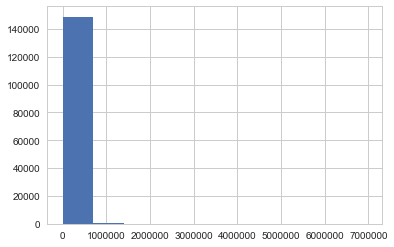

In [70]:
plt.hist(feet_df[feet_df['lotsizesquarefeet'].notnull()==True]['lotsizesquarefeet'])

##### 6) tax와 관련된 변수들 (total 7)
- taxvaluedollarcnt
- structuretaxvaluedollarcnt
- landtaxvaluedollarcnt
- taxamount
- assessmentyear
- taxdelinquencyflag
- taxdelinquencyyear

In [72]:
# without 'taxdelinquencyflag'
tax_columns = ["parcelid","logerror","taxvaluedollarcnt","structuretaxvaluedollarcnt"\
               ,"landtaxvaluedollarcnt","taxamount","assessmentyear","taxdelinquencyyear"]
tax_df = merged[tax_columns]
tax_df = tax_df.set_index('parcelid')
tax_df.tail()

,logerror,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,assessmentyear,taxdelinquencyyear
parcelid,,,,,,,
10833991,-0.002245,379000.0,265000.0,114000.0,4685.34,2016.0,NaN
11000655,0.020615,354621.0,70917.0,283704.0,4478.43,2016.0,NaN
17239384,0.013209,67205.0,50683.0,16522.0,1107.48,2016.0,NaN
12773139,0.037129,49546.0,32797.0,16749.0,876.43,2016.0,NaN
12826780,0.007204,522000.0,140000.0,382000.0,6317.15,2016.0,NaN


In [73]:
tax_df.shape

(167888, 7)

#### - All tax variables's describe + Data Type + Missing Value Ratio

In [74]:
tax_df_desc = tax_df.describe().transpose()
tax_df_desc["data type"] = tax_df.dtypes
tax_df_desc["MV ratio"] = round(tax_df.isnull().sum()/tax_df.shape[0]*100,3)
tax_df_desc 

,count,mean,std,min,25%,50%,75%,max,data type,MV ratio
logerror,167888.0,0.013906,0.165706,-4.65542,-0.0253,0.006,0.0392,5.262999e+00,float64,0.000
taxvaluedollarcnt,167852.0,472683.323088,602837.205637,22.00000,202652.2500,350000.000,554002.0000,4.906124e+07,float64,0.021
structuretaxvaluedollarcnt,167359.0,184346.020041,219284.074003,44.00000,82568.0000,134051.000,214257.0000,1.142179e+07,float64,0.315
landtaxvaluedollarcnt,167851.0,288880.468862,445645.116079,22.00000,83730.0000,197776.000,355334.0000,4.895220e+07,float64,0.022
taxamount,167843.0,5989.515575,7214.731946,19.92000,2798.0700,4501.040,6914.1650,5.866393e+05,float64,0.027
assessmentyear,167854.0,2015.462181,0.498569,2015.00000,2015.0000,2015.000,2016.0000,2.016000e+03,float64,0.020
taxdelinquencyyear,4683.0,13.827247,2.421658,3.00000,13.0000,14.000,15.0000,9.900000e+01,float64,97.211


#### - All tax variables's Missing Value Plot

In [75]:
tax_missing = pd.DataFrame(tax_df_desc["MV ratio"].sort_values(ascending=False))
tax_missing

,MV ratio
taxdelinquencyyear,97.211
structuretaxvaluedollarcnt,0.315
taxamount,0.027
landtaxvaluedollarcnt,0.022
taxvaluedollarcnt,0.021
assessmentyear,0.020
logerror,0.000


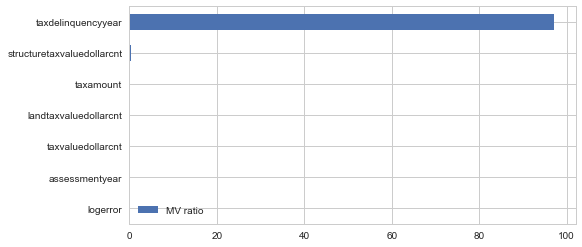

In [76]:
tax_missing.sort_values(by = "MV ratio", ascending = True).plot(kind = 'barh', figsize=(8,4))
plt.show()

##### (6)-1. taxvaluedollarcnt
- The total tax assessed value of the parcel
- 토지(땅의 구획)의 총 세금 평가 가치

In [77]:
tax_df_desc.loc['taxvaluedollarcnt'].reset_index()

,index,taxvaluedollarcnt
0,count,167852
1,mean,472683
2,std,602837
3,min,22
4,25%,202652
5,50%,350000
6,75%,554002
7,max,4.90612e+07
8,data type,float64
9,MV ratio,0.021


(array([  1.67448000e+05,   3.38000000e+02,   4.70000000e+01,
          9.00000000e+00,   5.00000000e+00,   4.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  2.20000000e+01,   4.90614340e+06,   9.81226480e+06,
          1.47183862e+07,   1.96245076e+07,   2.45306290e+07,
          2.94367504e+07,   3.43428718e+07,   3.92489932e+07,
          4.41551146e+07,   4.90612360e+07]),
 <a list of 10 Patch objects>)

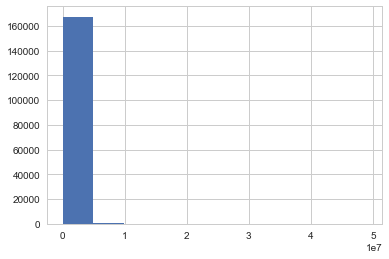

In [78]:
plt.hist(tax_df[tax_df['taxvaluedollarcnt'].notnull()==True]['taxvaluedollarcnt'])

##### (6)-2. structuretaxvaluedollarcnt
- The assessed value of the built structure on the parcel
- 건설된 구조물에 대한 토지(땅의 구획)의 평가 값

In [79]:
tax_df_desc.loc['structuretaxvaluedollarcnt'].reset_index()

,index,structuretaxvaluedollarcnt
0,count,167359
1,mean,184346
2,std,219284
3,min,44
4,25%,82568
5,50%,134051
6,75%,214257
7,max,1.14218e+07
8,data type,float64
9,MV ratio,0.315


(array([  1.66173000e+05,   9.73000000e+02,   1.41000000e+02,
          3.70000000e+01,   1.90000000e+01,   5.00000000e+00,
          8.00000000e+00,   0.00000000e+00,   2.00000000e+00,
          1.00000000e+00]),
 array([  4.40000000e+01,   1.14221860e+06,   2.28439320e+06,
          3.42656780e+06,   4.56874240e+06,   5.71091700e+06,
          6.85309160e+06,   7.99526620e+06,   9.13744080e+06,
          1.02796154e+07,   1.14217900e+07]),
 <a list of 10 Patch objects>)

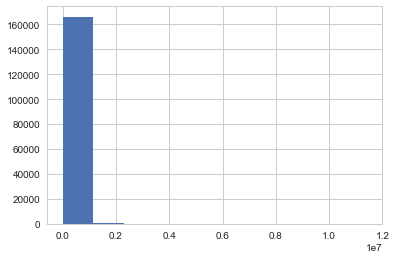

In [80]:
plt.hist(tax_df[tax_df['structuretaxvaluedollarcnt'].notnull()==True]['structuretaxvaluedollarcnt'])

##### (6)-3. landtaxvaluedollarcnt
- The assessed value of the land area of the parcel
- 토지(땅의 구획)의 토지 면적에 대한 평가 값

In [81]:
tax_df_desc.loc['landtaxvaluedollarcnt'].reset_index()

,index,landtaxvaluedollarcnt
0,count,167851
1,mean,288880
2,std,445645
3,min,22
4,25%,83730
5,50%,197776
6,75%,355334
7,max,4.89522e+07
8,data type,float64
9,MV ratio,0.022


(array([  1.67670000e+05,   1.48000000e+02,   2.20000000e+01,
          8.00000000e+00,   1.00000000e+00,   1.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  2.20000000e+01,   4.89523960e+06,   9.79045720e+06,
          1.46856748e+07,   1.95808924e+07,   2.44761100e+07,
          2.93713276e+07,   3.42665452e+07,   3.91617628e+07,
          4.40569804e+07,   4.89521980e+07]),
 <a list of 10 Patch objects>)

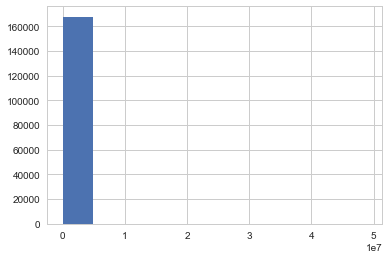

In [82]:
plt.hist(tax_df[tax_df['landtaxvaluedollarcnt'].notnull()==True]['landtaxvaluedollarcnt'])

##### (6)-4. taxamount
- The total property tax assessed for that assessment year
- 해당 과세 연도에 대해 평가된 총 재산세

In [83]:
tax_df_desc.loc['taxamount'].reset_index()

,index,taxamount
0,count,167843
1,mean,5989.52
2,std,7214.73
3,min,19.92
4,25%,2798.07
5,50%,4501.04
6,75%,6914.16
7,max,586639
8,data type,float64
9,MV ratio,0.027


(array([  1.67441000e+05,   3.37000000e+02,   4.50000000e+01,
          1.00000000e+01,   6.00000000e+00,   3.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]),
 array([  1.99200000e+01,   5.86818580e+04,   1.17343796e+05,
          1.76005734e+05,   2.34667672e+05,   2.93329610e+05,
          3.51991548e+05,   4.10653486e+05,   4.69315424e+05,
          5.27977362e+05,   5.86639300e+05]),
 <a list of 10 Patch objects>)

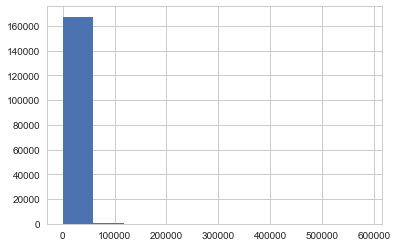

In [84]:
plt.hist(tax_df[tax_df['taxamount'].notnull()==True]['taxamount'])

##### (6)-5. assessmentyear
- The year of the property tax assessment
- 재산세 평가 년도

In [85]:
tax_df_desc.loc['assessmentyear'].reset_index()

,index,assessmentyear
0,count,167854
1,mean,2015.46
2,std,0.498569
3,min,2015
4,25%,2015
5,50%,2015
6,75%,2016
7,max,2016
8,data type,float64
9,MV ratio,0.02


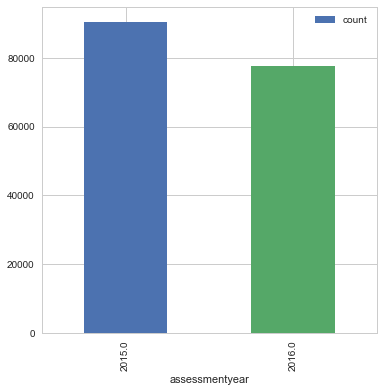

In [86]:
tax_df.groupby("assessmentyear").size().reset_index(name='count')\
.plot(x = 'assessmentyear', y = 'count', kind = 'bar', figsize=(6, 6))
plt.show()

(array([ 90275.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,  77579.]),
 array([ 2015. ,  2015.1,  2015.2,  2015.3,  2015.4,  2015.5,  2015.6,
         2015.7,  2015.8,  2015.9,  2016. ]),
 <a list of 10 Patch objects>)

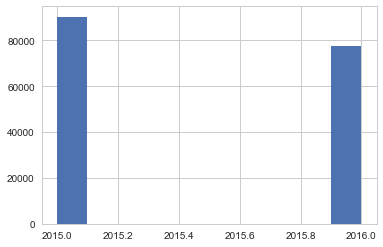

In [87]:
plt.hist(tax_df[tax_df['assessmentyear'].notnull()==True]['assessmentyear'])

##### (6)-6. taxdelinquencyflag
- Property taxes for this parcel are past due as of 2015
- 2015 년까지 만기되는 토지(땅의 구획)의 재산세

In [88]:
merged['taxdelinquencyflag'].value_counts()

Y    4683
Name: taxdelinquencyflag, dtype: int64

In [89]:
merged['taxdelinquencyflag'].describe()

count     4683
unique       1
top          Y
freq      4683
Name: taxdelinquencyflag, dtype: object

In [90]:
merged['taxdelinquencyflag'].isnull().sum()/merged.shape[0]*100

97.210640426951301

##### (6)-7. taxdelinquencyyear
- Year for which the unpaid propert taxes were due
- 미납 된 재산세 납부시기

In [91]:
tax_df['taxdelinquencyyear'].value_counts()

15.0    2078
14.0    1429
13.0     397
12.0     267
11.0     183
10.0     155
9.0      110
8.0       38
7.0       18
6.0        4
99.0       2
4.0        1
3.0        1
Name: taxdelinquencyyear, dtype: int64

In [92]:
tax_df_desc.loc['taxdelinquencyyear'].reset_index()

,index,taxdelinquencyyear
0,count,4683
1,mean,13.8272
2,std,2.42166
3,min,3
4,25%,13
5,50%,14
6,75%,15
7,max,99
8,data type,float64
9,MV ratio,97.211


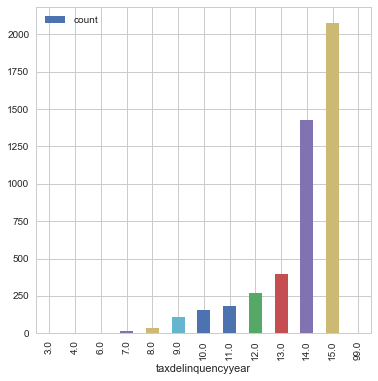

In [93]:
tax_df.groupby("taxdelinquencyyear").size().reset_index(name='count')\
.plot(x = 'taxdelinquencyyear', y = 'count', kind = 'bar', figsize=(6, 6))
plt.show()

(array([  7.77000000e+02,   3.90400000e+03,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          2.00000000e+00]),
 array([  3. ,  12.6,  22.2,  31.8,  41.4,  51. ,  60.6,  70.2,  79.8,
         89.4,  99. ]),
 <a list of 10 Patch objects>)

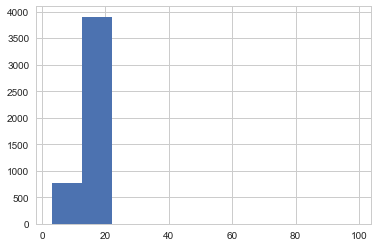

In [94]:
plt.hist(tax_df[tax_df['taxdelinquencyyear'].notnull()==True]['taxdelinquencyyear'])

### 2.4 Relationship between Logerror and variables

##### 5) 집의 면적에 대한 변수들 (total 13)
- basementsqft
- finishedfloor1squarefeet
- calculatedfinishedsquarefeet
- finishedsquarefeet6
- finishedsquarefeet12
- finishedsquarefeet13
- finishedsquarefeet15
- finishedsquarefeet50
- yardbuildingsqft17
- yardbuildingsqft26
- garagecarcnt
- garagetotalsqft
- lotsizesquarefeet

#### - logerror vs all feet variables

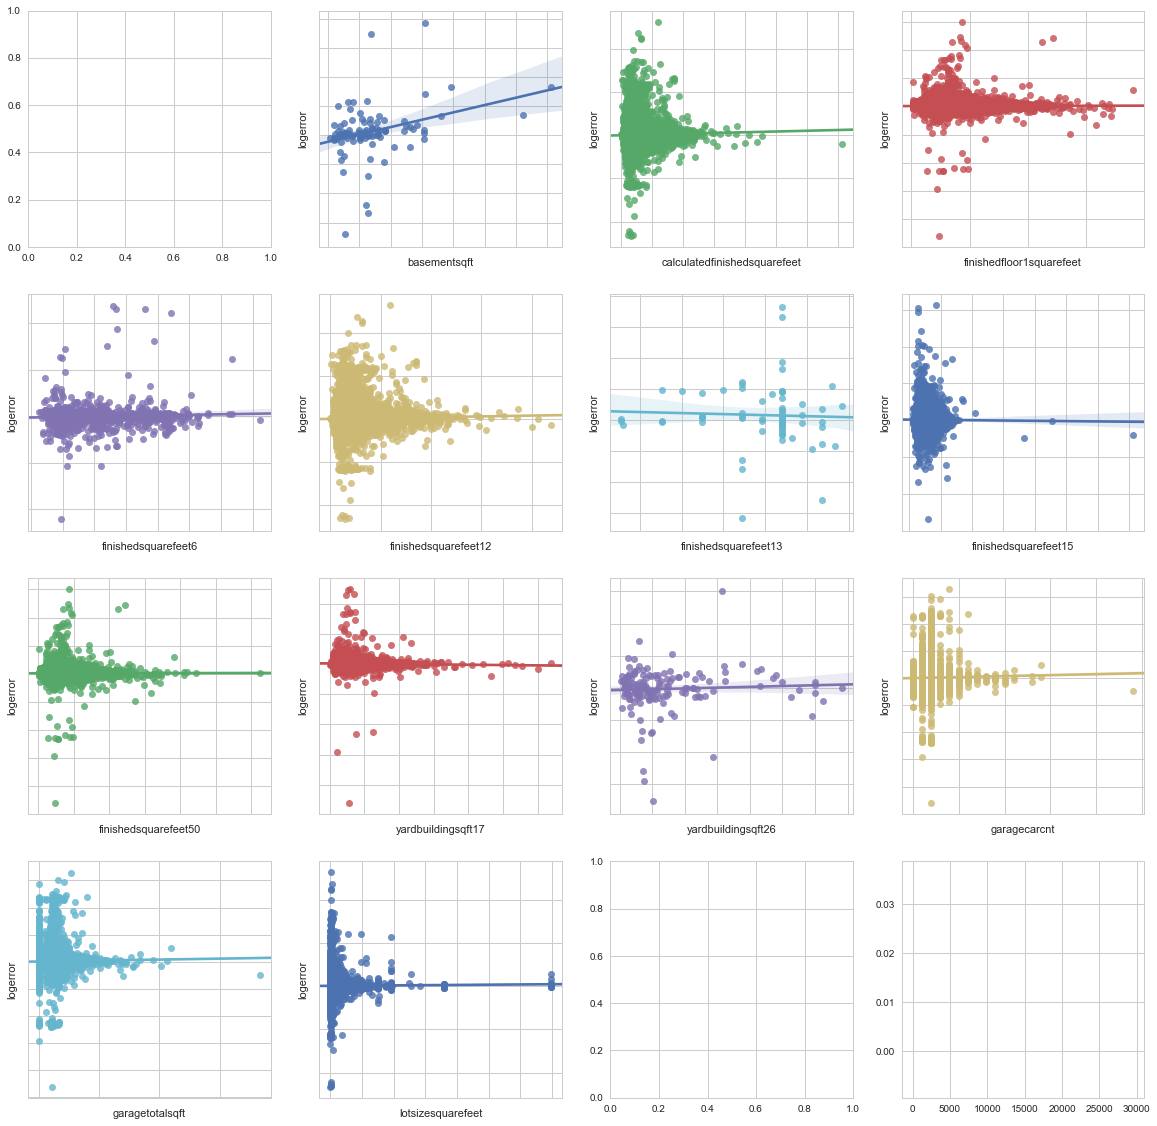

In [95]:
fig, ax = plt.subplots(4,4, figsize = (20,20))

for idx, n in enumerate(feet_df.columns):
    if n == 'logerror':
        continue
    sns.regplot(x=n, y='logerror', data=merged, ax = ax[idx//4,idx%4])
    ax[idx//4, idx%4].set(yticklabels=[])
    ax[idx//4, idx%4].set(xticklabels=[])
    continue

#### basementsqft 와 logerror의 관계

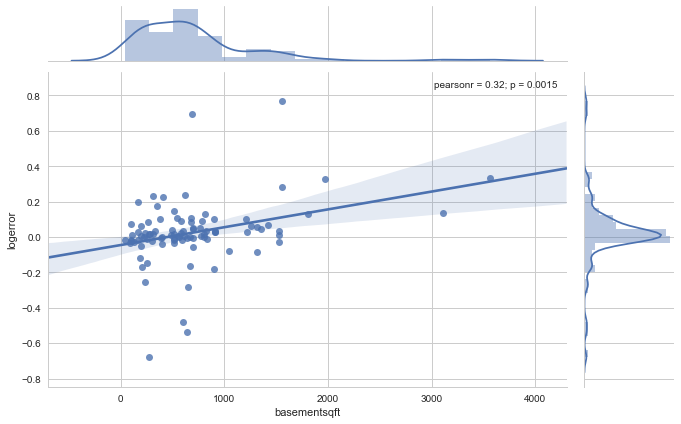

In [96]:
plot = sns.jointplot(x = "basementsqft", y = "logerror", data=merged, kind="reg")
plot.fig.set_size_inches(10,6)

#### calculatedfinishedsquarefeet 와 logerror의 관계

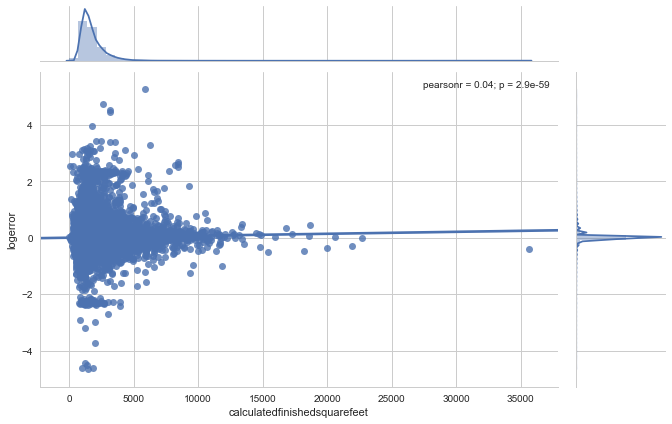

In [97]:
plot = sns.jointplot(x = "calculatedfinishedsquarefeet", y = "logerror", data=merged, kind="reg")
plot.fig.set_size_inches(10,6)

#### finishedfloor1squarefeet 와 logerror의 관계

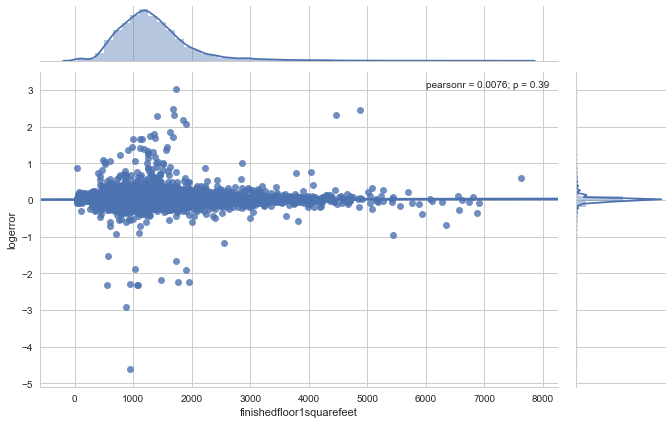

In [98]:
plot = sns.jointplot(x = "finishedfloor1squarefeet", y = "logerror", data=merged, kind="reg")
plot.fig.set_size_inches(10,6)

#### finishedsquarefeet6 와 logerror의 관계

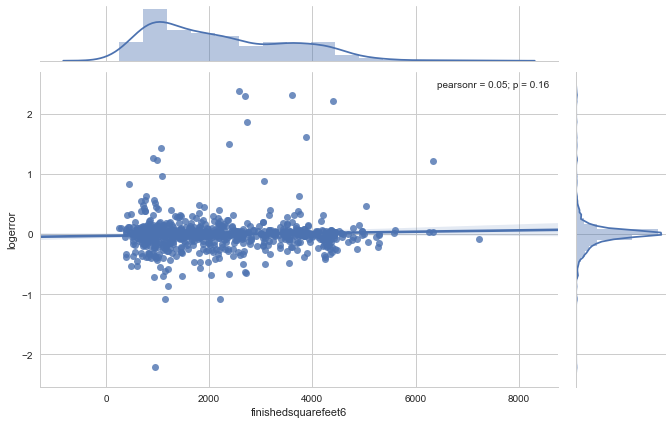

In [99]:
plot = sns.jointplot(x = "finishedsquarefeet6", y = "logerror", data=merged, kind="reg")
plot.fig.set_size_inches(10,6)

#### finishedsquarefeet12 와 logerror의 관계

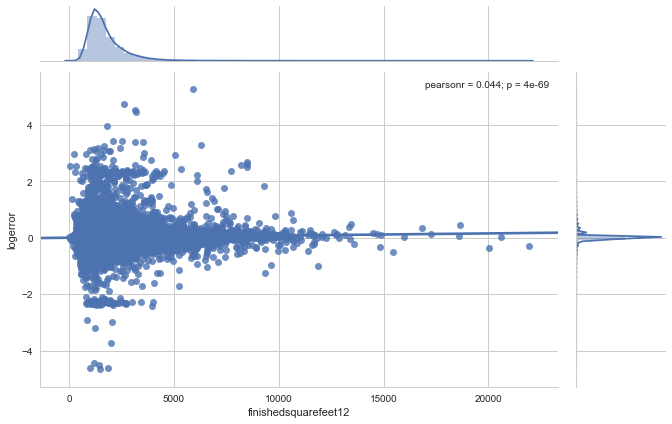

In [100]:
plot = sns.jointplot(x = "finishedsquarefeet12", y = "logerror", data=merged, kind="reg")
plot.fig.set_size_inches(10,6)

#### finishedsquarefeet13 와 logerror의 관계

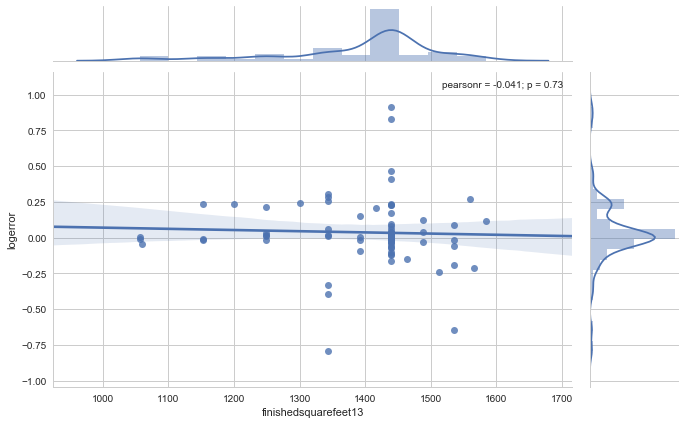

In [101]:
plot = sns.jointplot(x = "finishedsquarefeet13", y = "logerror", data=merged, kind="reg")
plot.fig.set_size_inches(10,6)

#### finishedsquarefeet15 와 logerror의 관계

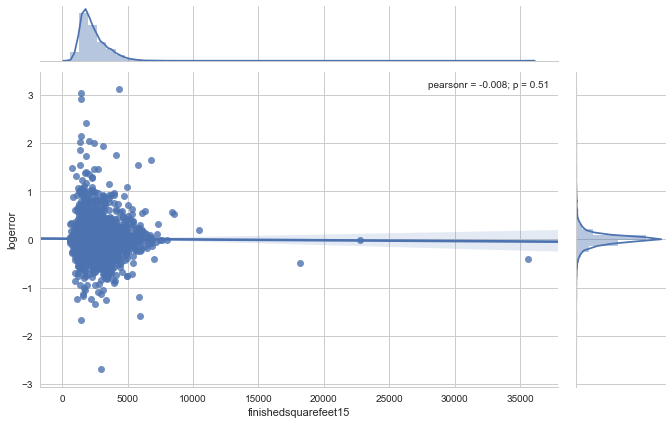

In [102]:
plot = sns.jointplot(x = "finishedsquarefeet15", y = "logerror", data=merged, kind="reg")
plot.fig.set_size_inches(10,6)

#### finishedsquarefeet50 와 logerror의 관계

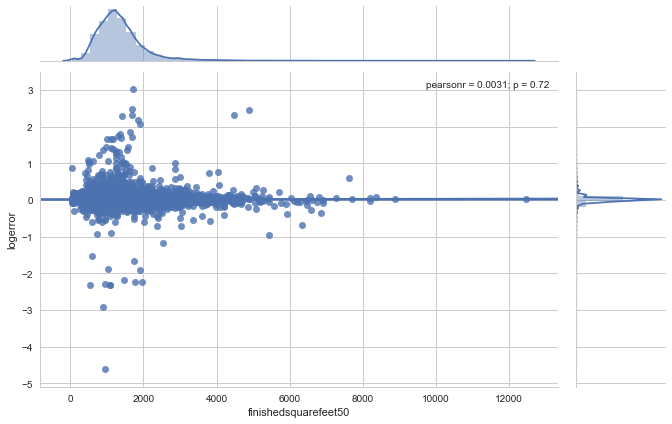

In [103]:
plot = sns.jointplot(x = "finishedsquarefeet50", y = "logerror", data=merged, kind="reg")
plot.fig.set_size_inches(10,6)

#### yardbuildingsqft17 와 logerror의 관계

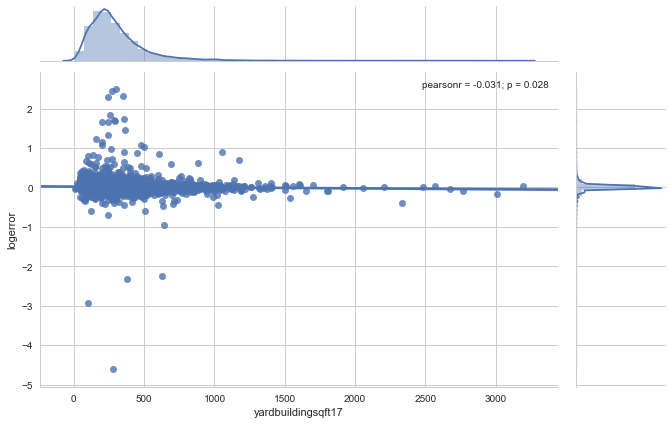

In [104]:
plot = sns.jointplot(x = "yardbuildingsqft17", y = "logerror", data=merged, kind="reg")
plot.fig.set_size_inches(10,6)

#### yardbuildingsqft26 와 logerror의 관계

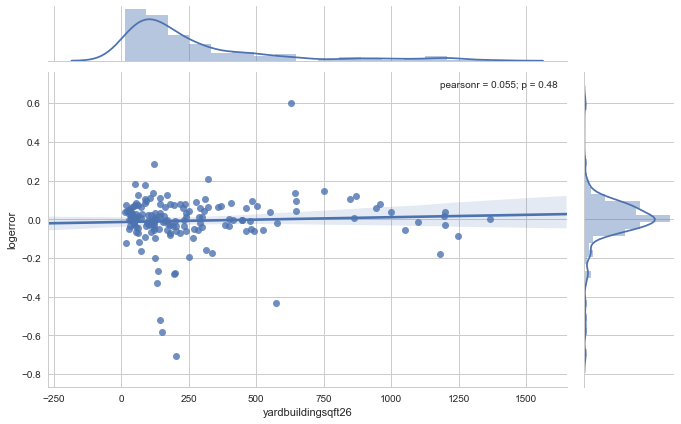

In [105]:
plot = sns.jointplot(x = "yardbuildingsqft26", y = "logerror", data=merged, kind="reg")
plot.fig.set_size_inches(10,6)

In [125]:
feet_df.corr()

,logerror,basementsqft,calculatedfinishedsquarefeet,finishedfloor1squarefeet,finishedsquarefeet6,finishedsquarefeet12,finishedsquarefeet13,finishedsquarefeet15,finishedsquarefeet50,yardbuildingsqft17,yardbuildingsqft26,garagecarcnt,garagetotalsqft,lotsizesquarefeet
logerror,1.000000,0.324681,0.039710,0.007591,0.049720,0.043977,-0.040595,-0.008050,0.003137,-0.030916,0.054912,0.027544,0.029616,0.007831
basementsqft,0.324681,1.000000,0.292972,0.197733,NaN,0.292972,NaN,NaN,0.112014,0.073589,-0.042162,0.322294,0.272369,0.056378
calculatedfinishedsquarefeet,0.039710,0.292972,1.000000,0.715416,1.000000,1.000000,1.000000,1.000000,0.701194,0.352249,0.205551,0.500805,0.601962,-0.051007
finishedfloor1squarefeet,0.007591,0.197733,0.715416,1.000000,NaN,0.715459,NaN,0.672938,0.969230,0.393797,0.275410,0.455037,0.595655,0.346679
finishedsquarefeet6,0.049720,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.039673,NaN,0.166976
finishedsquarefeet12,0.043977,0.292972,1.000000,0.715459,NaN,1.000000,NaN,NaN,0.701235,0.352231,0.207345,0.546804,0.622352,-0.049101
finishedsquarefeet13,-0.040595,NaN,1.000000,NaN,NaN,NaN,1.000000,NaN,NaN,0.099440,NaN,0.064192,NaN,-0.336417
finishedsquarefeet15,-0.008050,NaN,1.000000,0.672938,NaN,NaN,NaN,1.000000,0.672938,-0.709875,NaN,0.547437,NaN,0.118013
finishedsquarefeet50,0.003137,0.112014,0.701194,0.969230,NaN,0.701235,NaN,0.672938,1.000000,0.393953,0.279770,0.442530,0.572897,0.339062
yardbuildingsqft17,-0.030916,0.073589,0.352249,0.393797,NaN,0.352231,0.099440,-0.709875,0.393953,1.000000,-0.005221,0.270023,0.350467,0.184015


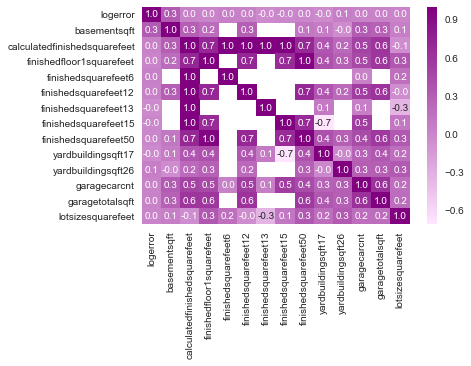

In [126]:
cmap = sns.light_palette("purple", as_cmap=True)
sns.heatmap(feet_df.corr(), annot=True, fmt='3.1f', cmap=cmap)
plt.show()

##### 6) tax와 관련된 변수들 (total 7)
- taxvaluedollarcnt
- structuretaxvaluedollarcnt
- landtaxvaluedollarcnt
- taxamount
- assessmentyear
- taxdelinquencyflag
- taxdelinquencyyear

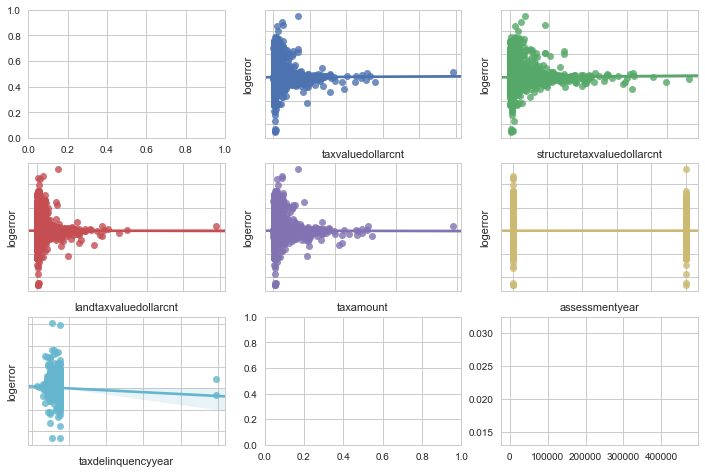

In [106]:
fig, ax = plt.subplots(3,3, figsize = (12,8))

for idx, n in enumerate(tax_df.columns):
    if n == 'logerror':
        continue
    sns.regplot(x=n, y='logerror', data=merged, ax = ax[idx//3,idx%3])
    ax[idx//3, idx%3].set(yticklabels=[])
    ax[idx//3, idx%3].set(xticklabels=[])
    continue

#### taxvaluedollarcnt 와 logerror의 관계

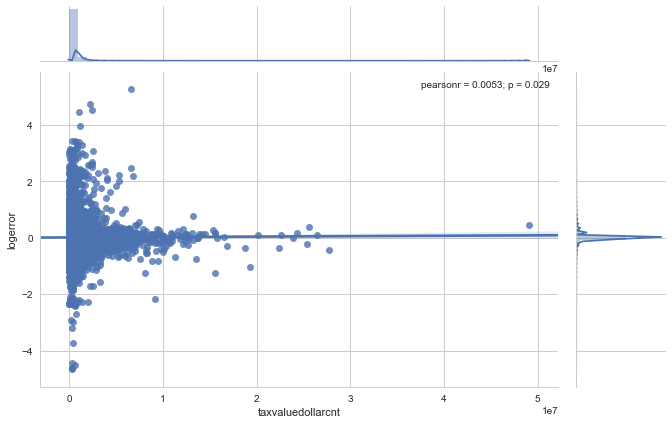

In [107]:
plot = sns.jointplot(x = "taxvaluedollarcnt", y = "logerror", data=merged, kind="reg")
plot.fig.set_size_inches(10,6)

#### structuretaxvaluedollarcnt 와 logerror의 관계

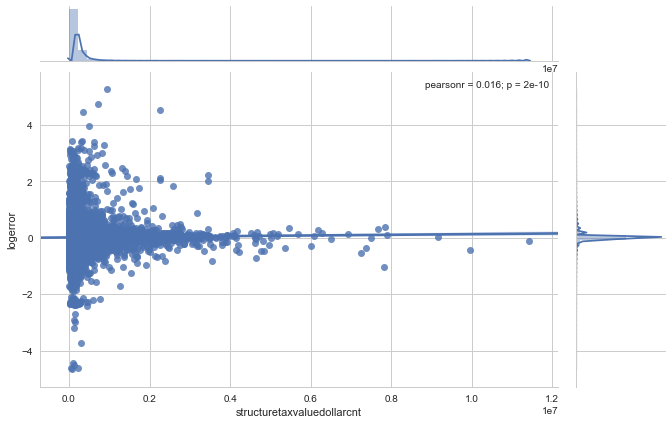

In [108]:
plot = sns.jointplot(x = "structuretaxvaluedollarcnt", y = "logerror", data=merged, kind="reg")
plot.fig.set_size_inches(10,6)

#### landtaxvaluedollarcnt 와 logerror의 관계

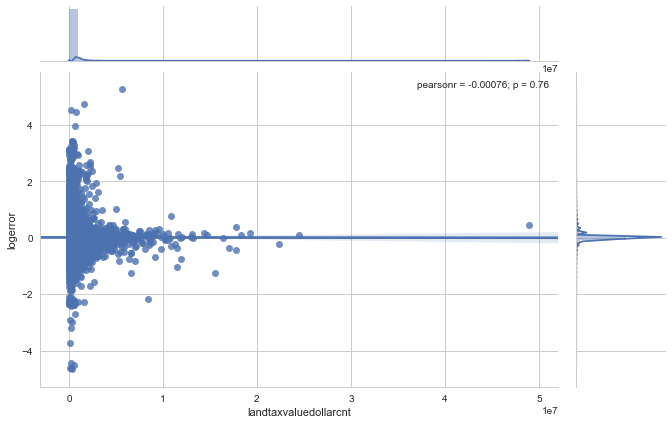

In [109]:
plot = sns.jointplot(x = "landtaxvaluedollarcnt", y = "logerror", data=merged, kind="reg")
plot.fig.set_size_inches(10,6)

#### taxamount 와 logerror의 관계

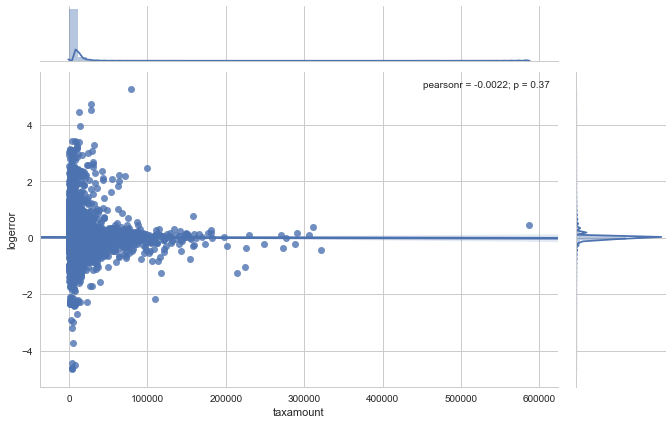

In [110]:
plot = sns.jointplot(x = "taxamount", y = "logerror", data=merged, kind="reg")
plot.fig.set_size_inches(10,6)

#### assessmentyear 와 logerror의 관계

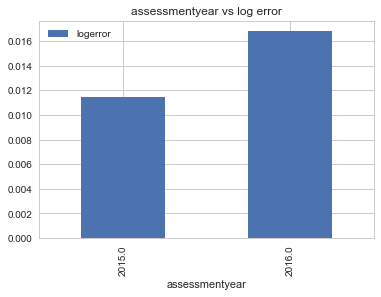

In [111]:
merged.loc[:,["assessmentyear","logerror"]].groupby("assessmentyear").agg('mean')\
.plot(kind = 'bar', figsize=(6, 4), title = "assessmentyear vs log error")
plt.show()

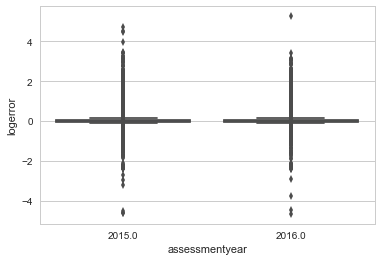

In [112]:
sns.boxplot(x = "assessmentyear", y = "logerror", data=merged)
plt.show()

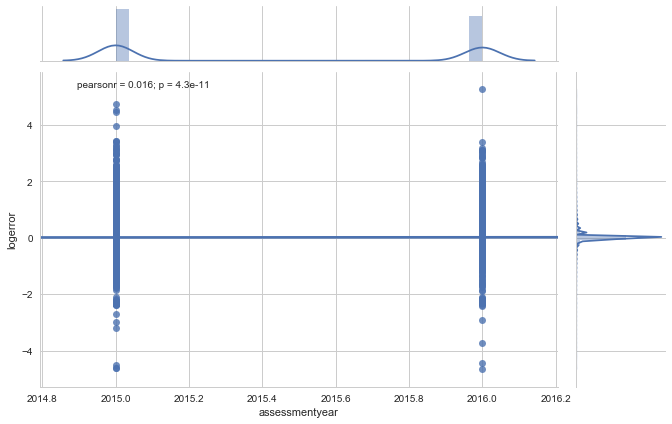

In [113]:
plot = sns.jointplot(x = "assessmentyear", y = "logerror", data=merged, kind="reg")
plot.fig.set_size_inches(10,6)

#### taxdelinquencyyear 와 logerror의 관계

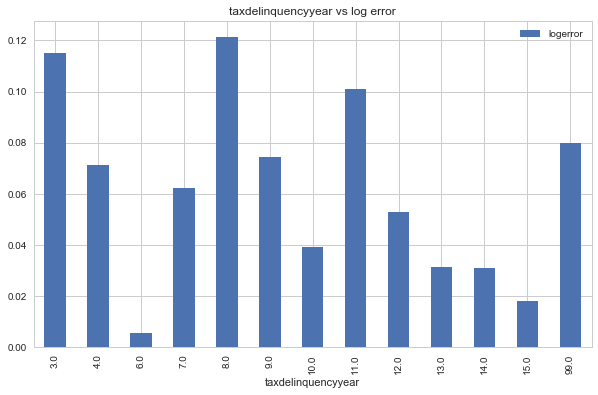

In [114]:
merged.loc[:,["taxdelinquencyyear","logerror"]].groupby("taxdelinquencyyear").agg('mean')\
.plot(kind = 'bar', figsize=(10, 6), title = "taxdelinquencyyear vs log error")
plt.show()

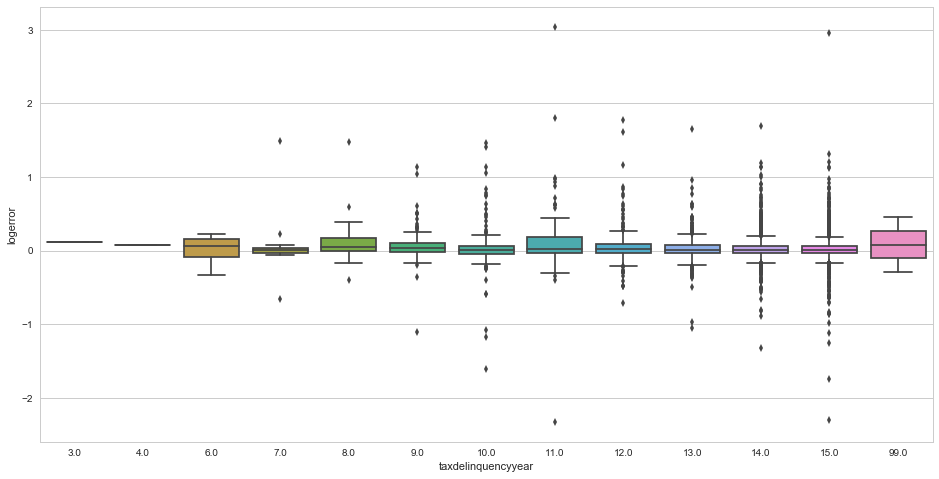

In [115]:
fig, ax = plt.subplots()
fig.set_size_inches(16, 8)
sns.boxplot(x = "taxdelinquencyyear", y = "logerror", data=merged)
plt.show()

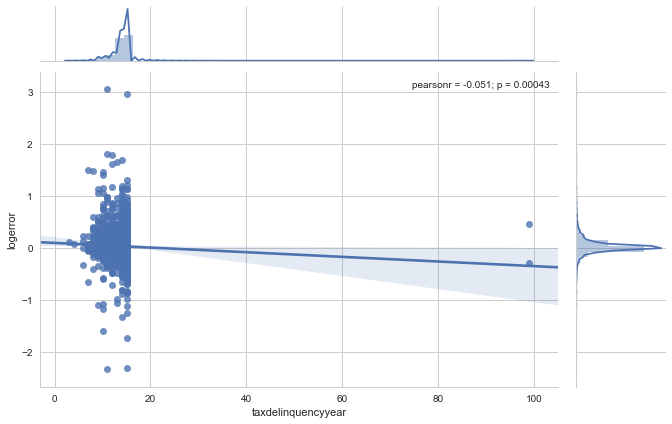

In [116]:
plot = sns.jointplot(x = "taxdelinquencyyear", y = "logerror", data=merged, kind="reg")
plot.fig.set_size_inches(10,6)

In [123]:
tax_df.corr()

,logerror,taxvaluedollarcnt,structuretaxvaluedollarcnt,landtaxvaluedollarcnt,taxamount,assessmentyear,taxdelinquencyyear
logerror,1.000000,0.005332,0.015546,-0.000759,-0.002186,0.016091,-0.051464
taxvaluedollarcnt,0.005332,1.000000,0.810343,0.956571,0.970235,0.026861,0.081283
structuretaxvaluedollarcnt,0.015546,0.810343,1.000000,0.605098,0.796876,0.020891,0.070660
landtaxvaluedollarcnt,-0.000759,0.956571,0.605098,1.000000,0.923791,0.025526,0.076512
taxamount,-0.002186,0.970235,0.796876,0.923791,1.000000,0.000828,0.069949
assessmentyear,0.016091,0.026861,0.020891,0.025526,0.000828,1.000000,0.137482
taxdelinquencyyear,-0.051464,0.081283,0.070660,0.076512,0.069949,0.137482,1.000000


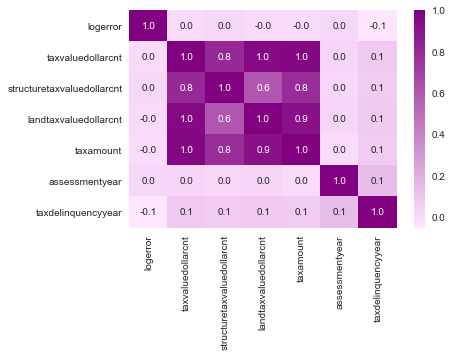

In [124]:
cmap = sns.light_palette("purple", as_cmap=True)
sns.heatmap(tax_df.corr(), annot=True, fmt='3.1f', cmap=cmap)
plt.show()

## **3. Feature Engineering**

### 3.1 Missing Values

#### 3.1.1 Join Train and Test Data

#### 3.1.2 Status of missing values

#### 3.1.3 Missing Values processing

### 3.2 Feature Correlation

#### 3.2.1 Numerical Features

#### 3.2.2 Categorical Features

### 3.3 Determination of outliers and variables using OLS model

#### 3.3.1 Model by all numerical Features

#### 3.3.2 Model by all categorical Features

#### 3.3.3 Model by numerical and categorical features together

#### 3.3.4 Model by high correlation coefficient numerical features with Logerror

#### 3.3.5 Model by high correlation coefficient numerical features and categorical features 

#### 3.3.6 Multi-collinearity and variance analysis between variables

##### (1) Multi-collinearity

##### (2) Analysis of variance on categorical features

#### 3.3.7 Comparison of model performance by using variables

### 3.4 Outlier

#### 1) Option1 : IQR (Interquartile Range)

#### 2) Option2 : Standardized resids

#### 3) Option3 : Cook's Distance

#### 4) Check all outliers (option 1,2,3)

#### 5) Combination of outliers groups

### 3.5 Data preprocessing

#### 3.5.1 Select numerical variables

#### 3.5.2 Select categorical variables

## **4. Modeling**

### 4.1. Input data

### 4.2 OLS(Ordinary Least Square) Model

#### 4.2.1 Make OLS Model

#### 4.2.2 ANOVA F-test

#### 4.2.3 RMSE

#### 4.2.4 Normalization of residuals

### 4.3 Predict Logerror